In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Earthquakes

## Load and visualize dataset

In [2]:
eq = pd.read_csv('earthquake.txt', sep=' ')

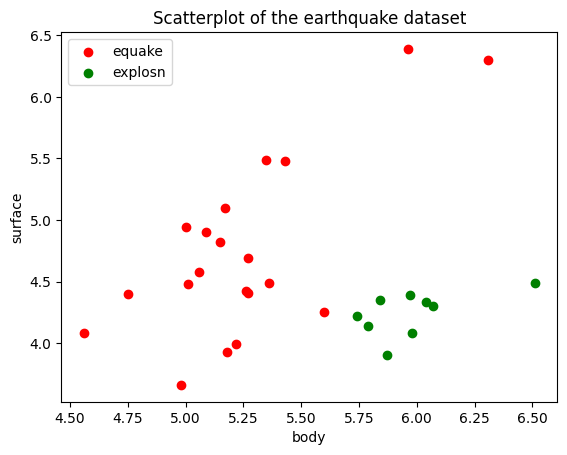

In [3]:
eq_1 = eq[eq['popn'] == 'equake'].iloc[:, 1:]
eq_0 = eq[eq['popn'] == 'explosn'].iloc[:, 1:]
plt.scatter(eq_1.iloc[:, 0], eq_1.iloc[:, 1], color='red')
plt.scatter(eq_0.iloc[:, 0], eq_0.iloc[:, 1], color='green')
plt.legend(['equake', 'explosn'])
plt.xlabel(eq_1.columns[0])
plt.ylabel(eq_1.columns[1])
plt.title('Scatterplot of the earthquake dataset')
plt.show()

In [4]:
# train LR models

X = eq.to_numpy()[:, 1:]
y = (eq.to_numpy()[:, 0] == 'equake').astype(int)

lr_raw = LogisticRegression(penalty=None)
lr_raw.fit(X, y)

lr_l2 = LogisticRegression(penalty='l2')
lr_l2.fit(X, y)

LogisticRegression()

In [ ]:
def plot_decision(model, model_name):
    '''
    Function to plot decision regions for the given model
    and global X, y datasets
    '''
    # Create points in the considered region
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the class for each point in the grid
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlGn_r)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlGn_r)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions of {model_name}')
    plt.show()

In [6]:
def print_info(model, model_name):
    '''
    Print information about the model
    The information are model coefficient and intercept,
        log likelihood and probabilities
    '''
    print(f'Intercept: {model.intercept_}')
    print(f'Coefficients: {model.coef_}')

    y_pred_proba = model.predict_proba(X)[:, 1]
    # y_pred_proba = np.clip(y_pred_proba, 1e-12, 1 - 1e-12)
    y1_index = y == 1
    y0_index = y == 0
    log_likelihood = 0
    log_likelihood += np.sum(np.log(y_pred_proba[y1_index]))
    log_likelihood += np.sum(np.log(1 - y_pred_proba[y0_index]))
    print(f'Log likelihood: {log_likelihood}')

    df = pd.DataFrame({'prediction': model.predict(X),'proba': y_pred_proba})
    df = pd.concat([eq.loc[:, ['body', 'surface']], (eq.loc[:, ['popn']] == 'equake').astype('int').rename(columns={'popn': 'y'}), df], axis=1)
    return df

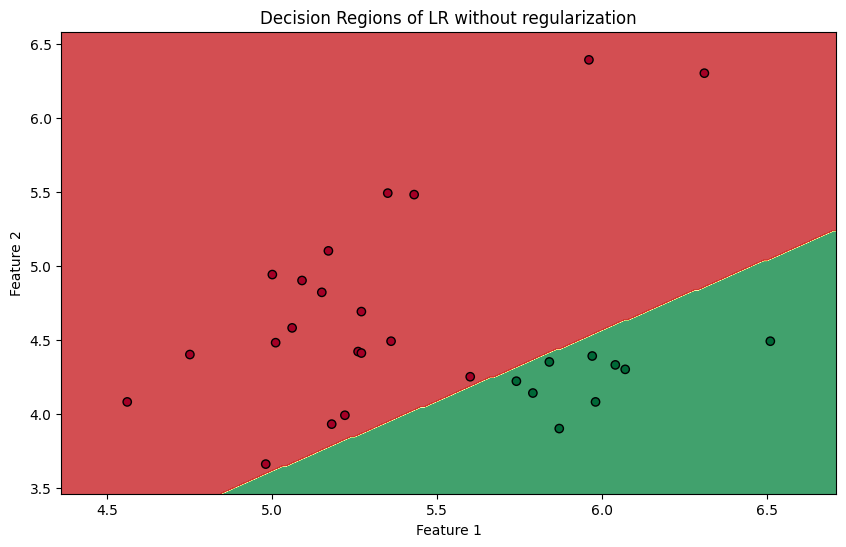

In [7]:
plot_decision(lr_raw, 'LR without regularization')

In [8]:
print_info(lr_raw, 'LR without regularization')

Intercept: [135.04765908]
Coefficients: [[-111.91608035  117.54515973]]
Log likelihood: -0.001482739940306592


,body,surface,y,prediction,proba
0,5.60,4.25,1,1,9.996236e-01
1,5.18,3.93,1,1,1.000000e+00
2,6.31,6.30,1,1,1.000000e+00
3,5.36,4.49,1,1,1.000000e+00
4,5.96,6.39,1,1,1.000000e+00
5,5.26,4.42,1,1,1.000000e+00
6,5.17,5.10,1,1,1.000000e+00
7,4.75,4.40,1,1,1.000000e+00
8,5.35,5.49,1,1,1.000000e+00
9,5.01,4.48,1,1,1.000000e+00


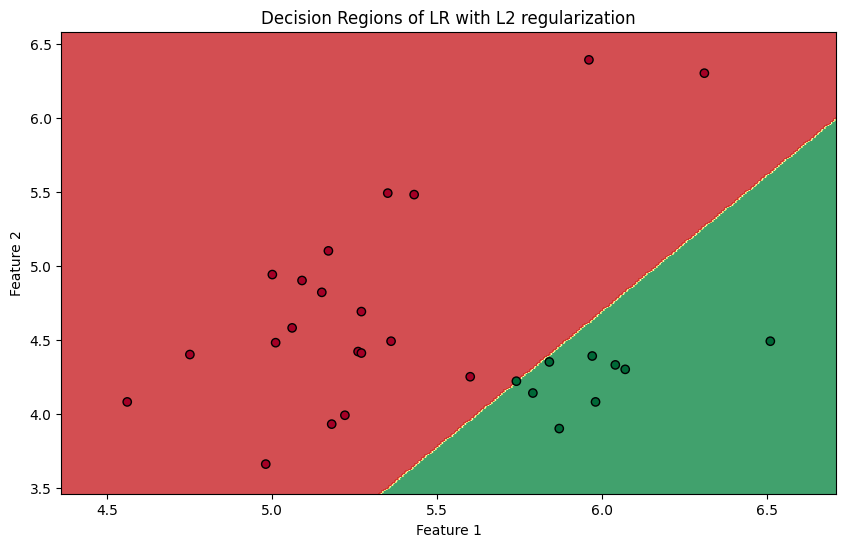

In [9]:
plot_decision(lr_l2, 'LR with L2 regularization')

In [10]:
print_info(lr_l2, 'lr_l2')

Intercept: [7.46937734]
Coefficients: [[-2.16922885  1.18171354]]
Log likelihood: -8.425076253244166


,body,surface,y,prediction,proba
0,5.60,4.25,1,1,0.585157
1,5.18,3.93,1,1,0.706181
2,6.31,6.30,1,1,0.773177
3,5.36,4.49,1,1,0.759183
4,5.96,6.39,1,1,0.890116
5,5.26,4.42,1,1,0.782859
6,5.17,5.10,1,1,0.907308
7,4.75,4.40,1,1,0.914125
8,5.35,5.49,1,1,0.913062
9,5.01,4.48,1,1,0.869395


## Simulation

In [11]:
L = 100
dims = [3, 5]
n_list = list(range(50, 101, 10)) + list(range(200, 1001, 100))

In [32]:
data = []

for n in n_list:
    mse_list = {}
    for d in dims:
        mse_list[d] = []
    
    for i in range(L):
        X = np.random.multivariate_normal(mean=np.zeros(5), cov=np.eye(5), size=n)
        p = 1 / (1 + np.exp(-(0.5 + X.sum(axis=1))))
        y = np.random.binomial(1, p)
        for d in dims:
            X_d = X[:, :d]
            lr = LogisticRegression()
            lr.fit(X_d, y)
            coef, intercept = lr.coef_, lr.intercept_
            mse = ((0.5 - intercept)**2 + np.sum((coef - 1)**2)) / (d + 1)
            mse_list[d].append(mse)
    
    for d in dims:
        data.append({'n': n, 'MSE': np.mean(mse_list[d]), 'Num dims': d})

df_data = pd.DataFrame(data)

Text(0.5, 1.0, 'Dependence of n parameter with MSE\nfor different data dimensionalities')

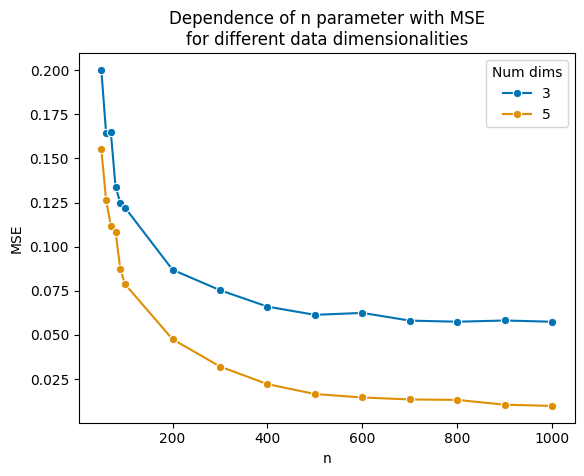

In [33]:
sns.lineplot(data=df_data, x='n', y='MSE', hue='Num dims', marker='o', palette='colorblind')
plt.title('Dependence of n parameter with MSE\nfor different data dimensionalities')